In [1]:
pip install opencv-python-headless


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python313\lib\site-packages\vboxapi-1.0-py3.13.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
print(cv2.__version__)


4.11.0


In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Set dataset path
dataset_path = "C:\\Users\\shash\\OneDrive\\Desktop\\mlpro\\prodigy infotech\\SVM\\PetImages"

# Image processing parameters
IMG_SIZE = 64  # Resize images to 64x64

In [4]:
# Load images and labels
def load_data(directory, category, limit=None):
    images = []
    labels = []
    path = os.path.join(directory, category)
    files = os.listdir(path)
    
    if limit:
        files = np.random.choice(files, min(limit, len(files)), replace=False)  # Select only 'limit' images randomly
    
    for file in files:
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img.flatten())
        labels.append(0 if category == "Cat" else 1)  # 0 = Cat, 1 = Dog
    
    return np.array(images), np.array(labels)


In [5]:
# Load 2835 Dog images
X_dogs, y_dogs = load_data(dataset_path, "Dog", limit=2835)

# Load 2835 Cat images
X_cats, y_cats = load_data(dataset_path, "Cat", limit=2835)

# Merge balanced dataset
X = np.vstack((X_cats, X_dogs))
y = np.hstack((y_cats, y_dogs))

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train SVM
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

Accuracy: 63.02%
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       583
           1       0.61      0.67      0.64       550

    accuracy                           0.63      1133
   macro avg       0.63      0.63      0.63      1133
weighted avg       0.63      0.63      0.63      1133



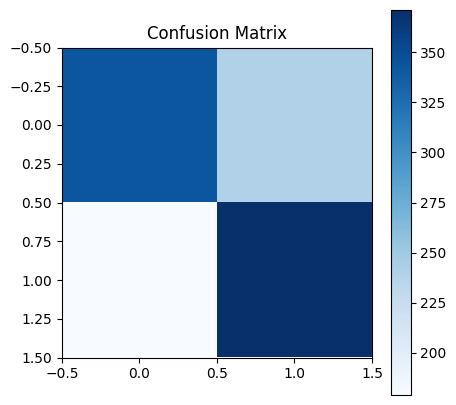

In [7]:
# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 5))
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [8]:
import joblib

# Save the model and scaler
joblib.dump(svm_model, "svm_cat_dog_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [9]:
# Load the saved model and scaler
svm_model = joblib.load("svm_cat_dog_model.pkl")
scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully!")


Model and scaler loaded successfully!


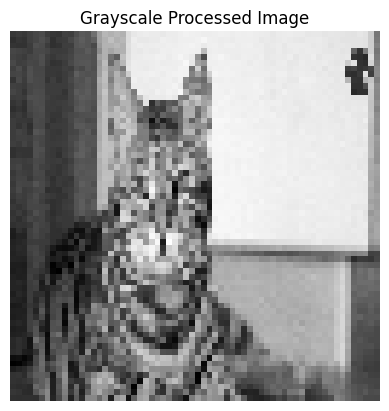

Predicted Class: Cat


In [16]:
import cv2
import numpy as np

# Function to preprocess a new image
def preprocess_image(image_path, img_size=64):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, (img_size, img_size))  # Resize to match training size
    img = img.flatten().reshape(1, -1)  # Flatten and reshape for model input
    img = scaler.transform(img)  # Apply the saved scaler
    return img

def display_grayscale_image(image_path, img_size=64):
    """
    Load an image, convert it to grayscale, resize it, and display it.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        raise ValueError("Error: Could not read the image. Check the file path.")

    img = cv2.resize(img, (img_size, img_size))  # Resize to match training size
    
    # Display the grayscale image
    plt.imshow(img, cmap="gray")
    plt.title("Grayscale Processed Image")
    plt.axis("off")
    plt.show()

# Load and classify a new image
image_path = "C:\\Users\\shash\\OneDrive\\Desktop\\Bengal_cat.jpg" # Change this to your test image
img_processed = preprocess_image(image_path)
display_grayscale_image(image_path)

# Predict class (0 = Cat, 1 = Dog)
prediction = svm_model.predict(img_processed)
label = "Dog" if prediction[0] == 1 else "Cat"

print(f"Predicted Class: {label}")


In [11]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(2246), np.int64(1): np.int64(2282)}


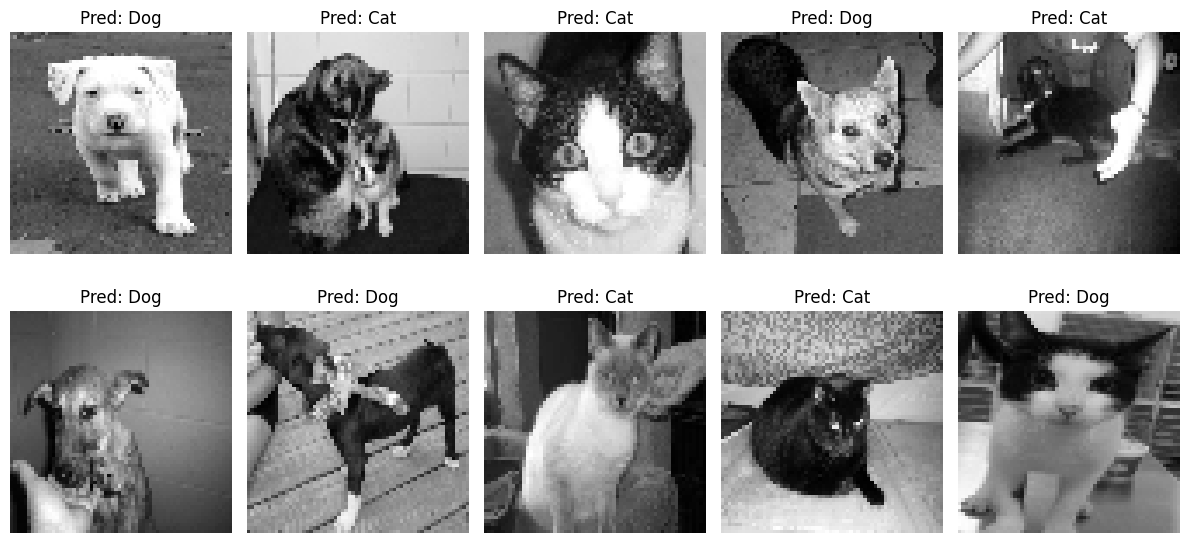

In [13]:
import matplotlib.pyplot as plt

# Select 10 random test images
indices = np.random.choice(len(X_test), 10, replace=False)
selected_images = X_test[indices]
selected_labels = y_test[indices]
predicted_labels = svm_model.predict(selected_images)  # Get model predictions

# Reshape images back to 64x64
selected_images = scaler.inverse_transform(selected_images)  # Undo normalization
selected_images = selected_images.reshape(-1, 64, 64)  # Reshape to (64, 64)

# Plot images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {'Dog' if predicted_labels[i] == 1 else 'Cat'}")

plt.tight_layout()
plt.show()
